In [49]:
# Import libraries
import os
import pickle

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scripts import get_binary_data

In [50]:
# Load csv file
df = pd.read_csv('./../data/processed_credit_risk_data.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30387,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,N,15
30388,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
30389,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
30390,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


In [51]:
# Data type in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30392 entries, 0 to 30391
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  30392 non-null  int64  
 1   person_income               30392 non-null  int64  
 2   person_home_ownership       30392 non-null  object 
 3   person_emp_length           30392 non-null  float64
 4   loan_intent                 30392 non-null  object 
 5   loan_grade                  30392 non-null  object 
 6   loan_amnt                   30392 non-null  int64  
 7   loan_int_rate               30392 non-null  float64
 8   loan_status                 30392 non-null  int64  
 9   loan_percent_income         30392 non-null  float64
 10  cb_person_default_on_file   30392 non-null  object 
 11  cb_person_cred_hist_length  30392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [52]:
# Statistics of each feature
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,30392.000000,3.039200e+04,30392.000000,30392.000000,30392.000000,30392.000000,30392.000000,30392.000000
mean,26.647111,6.455908e+04,4.417643,9534.317419,11.017091,0.219564,0.170933,5.229534
std,4.425236,4.509116e+04,3.380452,6279.474453,3.077190,0.413958,0.106805,3.282588
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.823800e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,25.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,29.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,7.000000
max,40.000000,1.200000e+06,14.000000,35000.000000,23.220000,1.000000,0.830000,17.000000


## Print pie chart of categorical variables

<Axes: ylabel='loan_intent'>

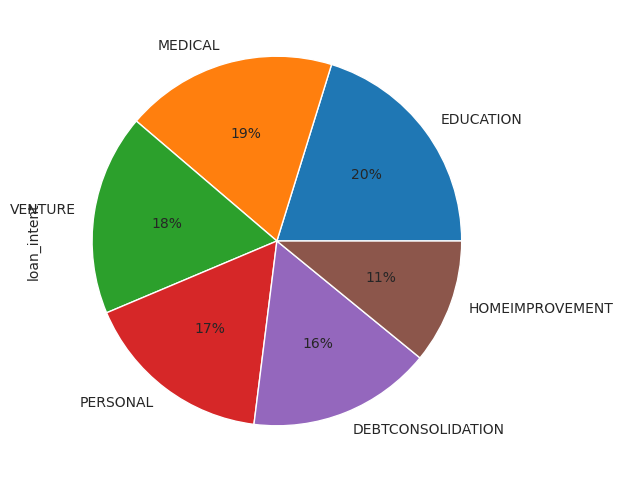

In [53]:
# Loan intend pie chart
df.loan_intent.value_counts().plot(
    kind='pie', y='loan_intent', autopct='%1.0f%%', figsize=(12, 6)
    )

<Axes: ylabel='person_home_ownership'>

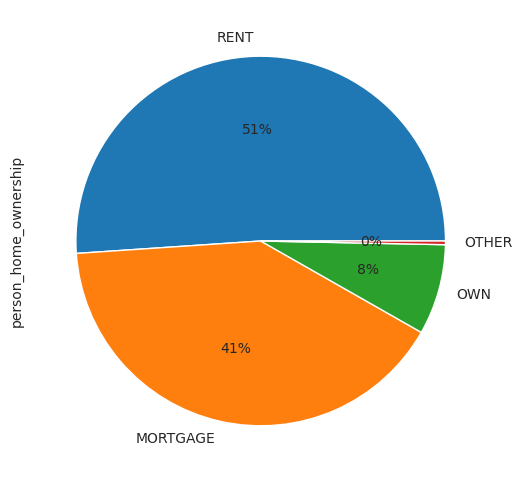

In [54]:
# Person home ownership pie chart
df.person_home_ownership.value_counts().plot(
    kind='pie', y='person_home_ownership', autopct='%1.0f%%', figsize=(12, 6)
)

<Axes: ylabel='cb_person_default_on_file'>

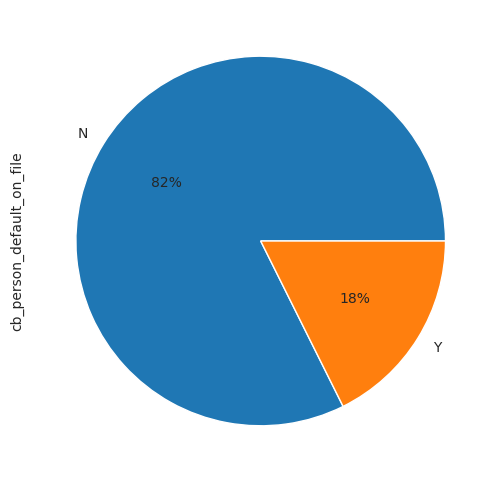

In [55]:
# Presence or absence of a history of default pie chart
df.cb_person_default_on_file.value_counts().plot(
    kind='pie', y='cb_person_default_on_file', autopct='%1.0f%%', figsize=(12, 6)
)

In [56]:
# Replace categorical variable with numeric for random forest training
df['cb_person_default_on_file'] = df.apply(lambda x: get_binary_data(x['cb_person_default_on_file']), axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30387,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0,0.03,0,15
30388,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,0,15
30389,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,0,12
30390,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,0,13


In [57]:
# Apply one-hot encoding to a categorical columns
df_feat = pd.get_dummies(df,
                         columns=['person_home_ownership', 'loan_intent', 'loan_grade'],
                         drop_first=True)

In [58]:
df_feat.keys()

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G'],
      dtype='object')

In [59]:
df_feat.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,1.000000,0.136204,0.073100,5.158054e-02,0.018649,-0.026839,-0.042096,0.009094,0.833741,-0.019084,...,0.105171,0.019941,2.328932e-03,-0.006876,-0.003443,0.007964,0.003684,0.007584,0.006388,0.008585
person_income,0.136204,1.000000,0.162016,3.599445e-01,-0.002109,-0.189442,-0.316887,-0.006019,0.105861,0.001964,...,0.061210,-0.043960,1.703568e-03,0.003458,0.010878,-0.026791,-0.015390,0.021922,0.019883,0.010870
person_emp_length,0.073100,0.162016,1.000000,1.124802e-01,-0.054157,-0.089398,-0.055348,-0.031316,0.060422,-0.015447,...,0.027152,-0.003006,9.512225e-03,0.000763,-0.002925,-0.039380,-0.014250,-0.016319,-0.011376,0.013347
loan_amnt,0.051581,0.359945,0.112480,1.000000e+00,0.137058,0.101544,0.574551,0.037581,0.037002,0.012643,...,0.042823,-0.028218,6.742211e-07,-0.001037,0.042127,-0.026424,0.067609,0.089287,0.068456,0.054236
loan_int_rate,0.018649,-0.002109,-0.054157,1.370582e-01,1.000000,0.317782,0.114378,0.477958,0.020829,0.014569,...,0.020846,0.005804,1.081780e-03,-0.008089,-0.004310,0.358753,0.454932,0.310677,0.188199,0.125252
loan_status,-0.026839,-0.189442,-0.089398,1.015442e-01,0.317782,1.000000,0.379684,0.177808,-0.019752,0.013673,...,0.040702,0.054199,-1.648874e-02,-0.074945,-0.093800,-0.011645,0.317951,0.179711,0.101483,0.081343
loan_percent_income,-0.042096,-0.316887,-0.055348,5.745506e-01,0.114378,0.379684,1.000000,0.035072,-0.026416,0.015236,...,-0.016056,0.009419,-2.305872e-04,0.002394,0.030594,0.003439,0.068028,0.056559,0.035729,0.031600
cb_person_default_on_file,0.009094,-0.006019,-0.031316,3.758055e-02,0.477958,0.177808,0.035072,1.000000,0.004556,0.013600,...,0.017032,-0.001998,-1.108069e-03,-0.002802,-0.318577,0.429287,0.313140,0.141348,0.067063,0.048223
cb_person_cred_hist_length,0.833741,0.105861,0.060422,3.700186e-02,0.020829,-0.019752,-0.026416,0.004556,1.000000,-0.009466,...,0.072997,0.015807,5.814213e-03,-0.004194,0.000503,0.010853,0.003470,0.001195,0.004751,0.010352
person_home_ownership_OTHER,-0.019084,0.001964,-0.015447,1.264324e-02,0.014569,0.013673,0.015236,0.013600,-0.009466,1.000000,...,-0.002946,-0.002975,-2.641984e-04,0.012156,-0.001477,-0.004817,0.009779,0.017543,0.008889,-0.002496


In [60]:
df_feat.corr()['cb_person_default_on_file'].sort_values(ascending=False)

cb_person_default_on_file      1.000000
loan_int_rate                  0.477958
loan_grade_C                   0.429287
loan_grade_D                   0.313140
loan_status                    0.177808
loan_grade_E                   0.141348
loan_grade_F                   0.067063
person_home_ownership_RENT     0.061730
loan_grade_G                   0.048223
loan_amnt                      0.037581
loan_percent_income            0.035072
loan_intent_HOMEIMPROVEMENT    0.017032
person_home_ownership_OTHER    0.013600
person_age                     0.009094
cb_person_cred_hist_length     0.004556
loan_intent_PERSONAL          -0.001108
loan_intent_MEDICAL           -0.001998
loan_intent_VENTURE           -0.002802
person_home_ownership_OWN     -0.003616
person_income                 -0.006019
loan_intent_EDUCATION         -0.009489
person_emp_length             -0.031316
loan_grade_B                  -0.318577
Name: cb_person_default_on_file, dtype: float64

<Axes: >

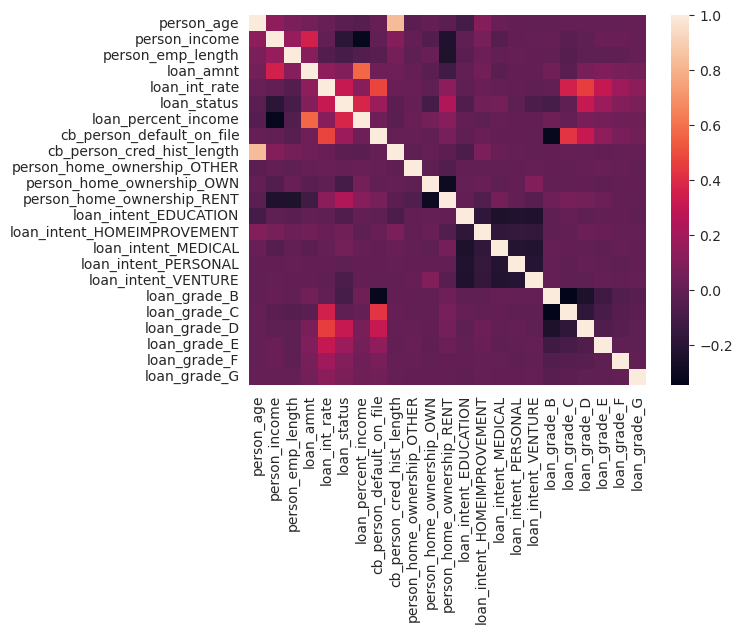

In [61]:
# Get heatmap of correlation matrix
sns.heatmap(df_feat.corr())

In [62]:
features = ['loan_int_rate', 'loan_status', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E']

In [63]:
# Get data for supervised training with random forest
X = df_feat[features]
y = df_feat.cb_person_default_on_file

In [64]:
# Separate 70% for training and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Instantiate classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [66]:
# Training
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Prediction
y_pred = clf.predict(X_test)

In [68]:
# Model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(100 * accuracy, 2)}%")

Accuracy: 82.49%


In [69]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6700,  804],
       [ 793,  821]])

In [70]:
# Get coefficients to validate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7504
           1       0.51      0.51      0.51      1614

    accuracy                           0.82      9118
   macro avg       0.70      0.70      0.70      9118
weighted avg       0.83      0.82      0.83      9118



In [71]:
file_path = os.path.abspath('..')

In [72]:
pickle.dump(clf, open(file_path + '/deploy/person_default_on_file.pkl', 'wb'))